# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
! pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Building query URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
api_key = weather_api_key
units = "imperial"

In [4]:
# Creating counters for looping through cities for successive API calls
record_counter = 1
set_counter = 1
city_data  = []

print("Beginning Data Retrieval")
print("------------------------")

# (1) for i in enumerate(cities) = assigning a number to each city name in the list
# (2) i % 50 == 0 requests to identity every 50th city name in the list (50,100,150,200,…) that don’t give you a remainder
# (3) i>=50 asks city name's already assigned values greater than 49, i.e. starts couting from the 50th city in the list
# (4) once both conditions are met then the counters increase by 1 and the next iteration commences

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        
        set_counter += 1
        record_counter = 0

    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    
    record_counter += 1

    # Using a series of successive API calls for each of the cities
    try:
        weather_response = requests.get(url + "&q=" + city).json()
        
        # Obtaining response info for each of the cities into dataframes
        city_country = weather_response["sys"]["country"]
        city_latitude = weather_response["coord"]["lat"]
        city_longitude = weather_response["coord"]["lon"]
        city_date = weather_response["dt"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]

        # Appending the City information into city_data list
        city_data.append({"Country": city_country, 
                          "City": city, 
                          "Latitude": city_latitude, 
                          "Longitude": city_longitude, 
                          "Date": city_date,
                          "Max Temperature (F)": city_max_temp, 
                          "Humidity (%)": city_humidity, 
                          "Cloudiness (%)": city_clouds, 
                          "Wind Speed (mph)": city_wind})

    # Assigning error message for any type e.g. NameError or TypeError or RuntimeError or SyntaxError
    except:
        print("City not found. Skipping ... ")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | san luis
Processing Record 2 of Set 1 | agadir
Processing Record 3 of Set 1 | sinnamary
Processing Record 4 of Set 1 | ruatoria
City not found. Skipping ... 
Processing Record 5 of Set 1 | brae
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | la asuncion
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | vostok
Processing Record 18 of Set 1 | sambava
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | mys shmidta
City not found. Skippin

Processing Record 36 of Set 4 | dudinka
Processing Record 37 of Set 4 | kracheh
City not found. Skipping ... 
Processing Record 38 of Set 4 | balabac
Processing Record 39 of Set 4 | taoudenni
Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | marzuq
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | bahia honda
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | sligo
Processing Record 48 of Set 4 | port moresby
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | kyshtovka
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | japura
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | araci
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | nikolskoye
Processing Record 9 of Set 5 | hovd


City not found. Skipping ... 
Processing Record 26 of Set 8 | ambilobe
Processing Record 27 of Set 8 | puerto penasco
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | port shepstone
Processing Record 30 of Set 8 | ancud
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | itarema
Processing Record 33 of Set 8 | broome
Processing Record 34 of Set 8 | porto santo
Processing Record 35 of Set 8 | coihaique
Processing Record 36 of Set 8 | lashio
Processing Record 37 of Set 8 | boa vista
Processing Record 38 of Set 8 | sistranda
Processing Record 39 of Set 8 | novobirilyussy
Processing Record 40 of Set 8 | sinegorye
Processing Record 41 of Set 8 | mandalgovi
Processing Record 42 of Set 8 | mezen
Processing Record 43 of Set 8 | rio gallegos
Processing Record 44 of Set 8 | sartell
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | talnakh
Processing Record 48 of Set 8 | catuday
Proces

Processing Record 13 of Set 12 | bac lieu
Processing Record 14 of Set 12 | alyangula
Processing Record 15 of Set 12 | la serena
Processing Record 16 of Set 12 | alofi
Processing Record 17 of Set 12 | ahuimanu
Processing Record 18 of Set 12 | zvishavane
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | palora
Processing Record 21 of Set 12 | carinhanha
Processing Record 22 of Set 12 | nishihara
Processing Record 23 of Set 12 | nanortalik
Processing Record 24 of Set 12 | conchagua
Processing Record 25 of Set 12 | evanston
Processing Record 26 of Set 12 | honiara
Processing Record 27 of Set 12 | fallon
Processing Record 28 of Set 12 | quatre cocos
Processing Record 29 of Set 12 | chipinge
Processing Record 30 of Set 12 | kedrovyy
Processing Record 31 of Set 12 | alpena
Processing Record 32 of Set 12 | baherden
Processing Record 33 of Set 12 | tourlaville
Processing Record 34 of Set 12 | turukhansk
Processing Record 35 of Set 12 | otradnoye
Processing Record 36 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data

cities_df = pd.DataFrame(city_data)
cities_df

,Country,City,Latitude,Longitude,Date,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,AR,san luis,-33.2950,-66.3356,1647747113,58.98,44,59,11.65
1,MA,agadir,30.4202,-9.5982,1647747113,59.45,87,56,4.43
2,GF,sinnamary,5.3833,-52.9500,1647747114,76.33,89,100,11.97
3,GB,brae,60.3964,-1.3530,1647747114,44.74,69,62,25.75
4,AU,new norfolk,-42.7826,147.0587,1647747115,68.92,52,100,1.01
...,...,...,...,...,...,...,...,...,...
563,UA,markova,48.6758,24.4138,1647747270,22.69,64,1,3.18
564,AU,victor harbor,-35.5667,138.6167,1647747271,68.00,77,94,9.73
565,US,meadow lake,34.8014,-106.5436,1647747271,57.34,11,98,8.86
566,US,salina,38.8403,-97.6114,1647747271,50.95,52,0,5.75


In [6]:
cities_df.describe()

,Latitude,Longitude,Date,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,568.000000,568.000000,5.680000e+02,568.000000,568.000000,568.000000,568.000000
mean,20.088223,19.053549,1.647747e+09,55.874771,70.010563,56.889085,8.287923
std,32.573443,88.560910,6.114660e+01,25.427871,22.428563,39.301530,5.846208
min,-54.800000,-175.200000,1.647747e+09,-28.970000,1.000000,0.000000,0.000000
25%,-6.004650,-56.505550,1.647747e+09,36.625000,60.000000,20.000000,4.175000
50%,22.622500,25.643400,1.647747e+09,60.880000,74.000000,62.000000,6.910000
75%,46.870600,96.138050,1.647747e+09,76.975000,88.000000,99.000000,11.010000
max,78.218600,179.316700,1.647747e+09,98.650000,100.000000,100.000000,35.100000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.

# cities_df[["Humidity (%)"]] = cities_df[["Humidity (%)"]]>100
# cities_df
# cities_df[["Humidity (%)"]].to_csv("Exportfile.csv", header=True)

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Clean_city_df = cities_df.drop(labels=["atuona"],axis=0,inplace=False)
# Clean_df


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

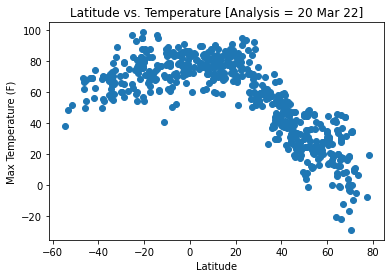

In [7]:
# Generate a scatter plot of Latitude vs. Temperature 
x_axis = cities_df["Latitude"]
y_axis_temp = cities_df["Max Temperature (F)"]
plt.scatter(x_axis,y_axis_temp)

plt.title("Latitude vs. Temperature [Analysis = 20 Mar 22]")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("VS_Lat_vs_Temp_scatterplot")
plt.show()
# print("Date of Analysis = 20th March 2022")

## Latitude vs. Humidity Plot

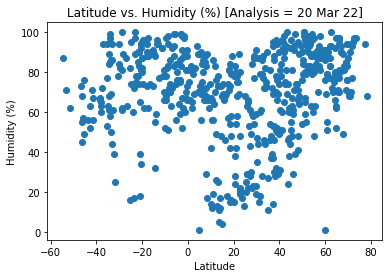

In [8]:
# Generate a scatter plot of Latitude vs. Humidity (%)
x_axis = cities_df["Latitude"]
y_axis_humid = cities_df["Humidity (%)"]
plt.scatter(x_axis,y_axis_humid)

plt.title("Latitude vs. Humidity (%) [Analysis = 20 Mar 22]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("VS_Lat_vs_Humid_scatterplot")
plt.show()
# print("Date of Analysis = 20th March 2022")

## Latitude vs. Cloudiness Plot

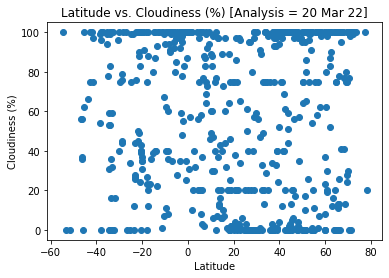

In [9]:
# Generate a scatter plot of Latitude vs. Cloudiness (%)
x_axis = cities_df["Latitude"]
y_axis_cloud = cities_df["Cloudiness (%)"]
plt.scatter(x_axis,y_axis_cloud)

plt.title("Latitude vs. Cloudiness (%) [Analysis = 20 Mar 22]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("VS_Lat_vs_Cloud_scatterplot")
plt.show()
# print("Date of Analysis = 20th March 2022")

## Latitude vs. Wind Speed Plot

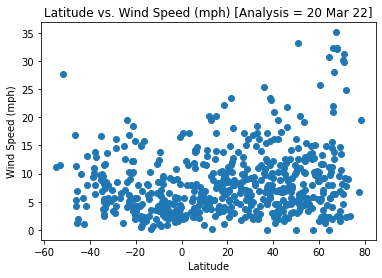

In [10]:
# Generate a scatter plot of Latitude vs. Wind Speed (mph)
x_axis = cities_df["Latitude"]
y_axis_wind = cities_df["Wind Speed (mph)"]
plt.scatter(x_axis,y_axis_wind)

plt.title("Latitude vs. Wind Speed (mph) [Analysis = 20 Mar 22]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("VS_Lat_vs_Wind_scatterplot")
plt.show()
# print("Date of Analysis = 20th March 2022")

## Linear Regression

In [11]:
# cities_df.dtypes
cities_df[["Latitude"]] = cities_df[["Latitude"]].fillna(0).astype(float)
cities_df

,Country,City,Latitude,Longitude,Date,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,AR,san luis,-33.2950,-66.3356,1647747113,58.98,44,59,11.65
1,MA,agadir,30.4202,-9.5982,1647747113,59.45,87,56,4.43
2,GF,sinnamary,5.3833,-52.9500,1647747114,76.33,89,100,11.97
3,GB,brae,60.3964,-1.3530,1647747114,44.74,69,62,25.75
4,AU,new norfolk,-42.7826,147.0587,1647747115,68.92,52,100,1.01
...,...,...,...,...,...,...,...,...,...
563,UA,markova,48.6758,24.4138,1647747270,22.69,64,1,3.18
564,AU,victor harbor,-35.5667,138.6167,1647747271,68.00,77,94,9.73
565,US,meadow lake,34.8014,-106.5436,1647747271,57.34,11,98,8.86
566,US,salina,38.8403,-97.6114,1647747271,50.95,52,0,5.75


In [12]:
Northern_Hemisphere = cities_df.loc[(cities_df["Latitude"]>=0), :]
Northern_Hemisphere

,Country,City,Latitude,Longitude,Date,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,MA,agadir,30.4202,-9.5982,1647747113,59.45,87,56,4.43
2,GF,sinnamary,5.3833,-52.9500,1647747114,76.33,89,100,11.97
3,GB,brae,60.3964,-1.3530,1647747114,44.74,69,62,25.75
5,PT,ponta do sol,32.6667,-17.1000,1647747115,59.05,77,49,14.85
6,US,hilo,19.7297,-155.0900,1647747115,78.53,79,75,10.36
...,...,...,...,...,...,...,...,...,...
562,US,brookings,44.3114,-96.7984,1647747270,41.38,60,0,3.44
563,UA,markova,48.6758,24.4138,1647747270,22.69,64,1,3.18
565,US,meadow lake,34.8014,-106.5436,1647747271,57.34,11,98,8.86
566,US,salina,38.8403,-97.6114,1647747271,50.95,52,0,5.75


In [13]:
Southern_Hemisphere = cities_df.loc[(cities_df["Latitude"]<0), :]
Southern_Hemisphere

,Country,City,Latitude,Longitude,Date,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,AR,san luis,-33.2950,-66.3356,1647747113,58.98,44,59,11.65
4,AU,new norfolk,-42.7826,147.0587,1647747115,68.92,52,100,1.01
9,AU,busselton,-33.6500,115.3333,1647747116,78.80,50,100,7.38
13,AU,carnarvon,-24.8667,113.6333,1647747117,82.47,74,75,12.66
16,MG,sambava,-14.2667,50.1667,1647747118,77.50,88,100,5.41
...,...,...,...,...,...,...,...,...,...
547,AU,dubbo,-32.2500,148.6167,1647747266,82.53,39,0,8.05
553,BR,paragominas,-2.9667,-47.4833,1647747267,70.18,99,97,1.68
556,BR,chapada dos guimaraes,-15.4606,-55.7497,1647747268,67.66,91,39,1.63
561,MZ,inhambane,-23.8650,35.3833,1647747270,74.03,60,99,8.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

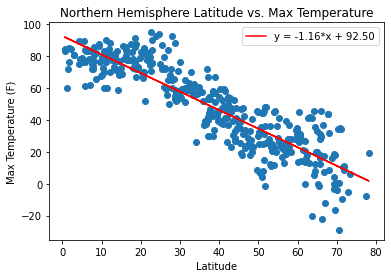

Correlation coefficient or r value = -0.883


In [14]:
# Generate a scatter plot of Northern Hemisphere Latitude vs. Temperature 
x_axis_north = Northern_Hemisphere["Latitude"]
y_axis_north_temp = Northern_Hemisphere["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north, y_axis_north_temp)
regress_values = x_axis_north*slope + intercept

plt.scatter(x_axis_north,y_axis_north_temp)
plt.plot(x_axis_north, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()

plt.savefig("VS_North_Lat_vs_Temp_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_north,y_axis_north_temp)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

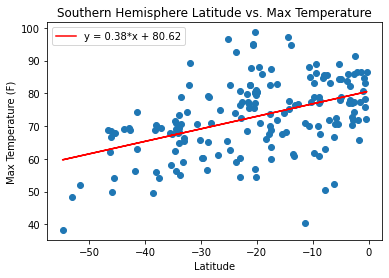

Correlation coefficient or r value = 0.46


In [15]:
# Generate a scatter plot of Southern Hemisphere Latitude vs. Temperature 
x_axis_south = Southern_Hemisphere["Latitude"]
y_axis_south_temp = Southern_Hemisphere["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south, y_axis_south_temp)
regress_values = x_axis_south*slope + intercept

plt.scatter(x_axis_south,y_axis_south_temp)
plt.plot(x_axis_south, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()

plt.savefig("VS_South_Lat_vs_Temp_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_south,y_axis_south_temp)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

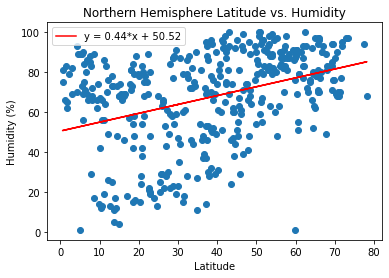

Correlation coefficient or r value = 0.373


In [16]:
# Generate a scatter plot of Northern Hemisphere Latitude vs. Humidity 
x_axis_north = Northern_Hemisphere["Latitude"]
y_axis_north_humid = Northern_Hemisphere["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north, y_axis_north_humid)
regress_values = x_axis_north*slope + intercept

plt.scatter(x_axis_north,y_axis_north_humid)
plt.plot(x_axis_north, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()

plt.savefig("VS_North_Lat_vs_Humid_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_north,y_axis_north_humid)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

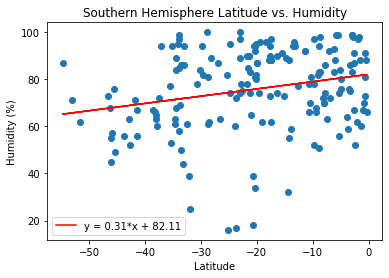

Correlation coefficient or r value = 0.239


In [17]:
# Generate a scatter plot of Southern Hemisphere Latitude vs. Humidity 
x_axis_south = Southern_Hemisphere["Latitude"]
y_axis_south_humid = Southern_Hemisphere["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south, y_axis_south_humid)
regress_values = x_axis_south*slope + intercept

plt.scatter(x_axis_south,y_axis_south_humid)
plt.plot(x_axis_south, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()

plt.savefig("VS_South_Lat_vs_Humid_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_south,y_axis_south_humid)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

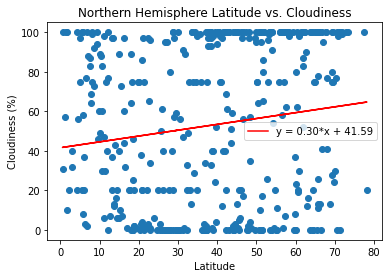

Correlation coefficient or r value = 0.146


In [18]:
# Generate a scatter plot of Northern Hemisphere Latitude vs. Cloudiness 
x_axis_north = Northern_Hemisphere["Latitude"]
y_axis_north_cloud = Northern_Hemisphere["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north, y_axis_north_cloud)
regress_values = x_axis_north*slope + intercept

plt.scatter(x_axis_north,y_axis_north_cloud)
plt.plot(x_axis_north, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()

plt.savefig("VS_North_Lat_vs_Cloud_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_north,y_axis_north_cloud)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

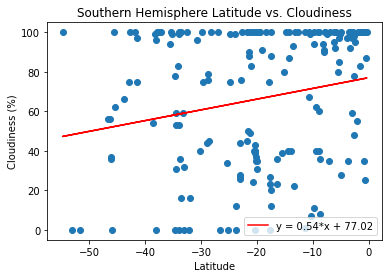

Correlation coefficient or r value = 0.212


In [19]:
# Generate a scatter plot of Southern Hemisphere Latitude vs. Cloudiness 
x_axis_south = Southern_Hemisphere["Latitude"]
y_axis_south_cloud = Southern_Hemisphere["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south, y_axis_south_cloud)
regress_values = x_axis_south*slope + intercept

plt.scatter(x_axis_south,y_axis_south_cloud)
plt.plot(x_axis_south, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()

plt.savefig("VS_South_Lat_vs_Cloud_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_south,y_axis_south_cloud)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

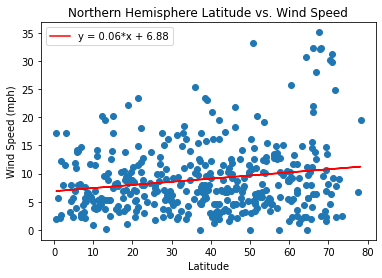

Correlation coefficient or r value = 0.18


In [20]:
# Generate a scatter plot of Northern Hemisphere Latitude vs. Wind Speed 
x_axis_north = Northern_Hemisphere["Latitude"]
y_axis_north_wind = Northern_Hemisphere["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north, y_axis_north_wind)
regress_values = x_axis_north*slope + intercept

plt.scatter(x_axis_north,y_axis_north_wind)
plt.plot(x_axis_north, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()

plt.savefig("VS_North_Lat_vs_Wind_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_north,y_axis_north_wind)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

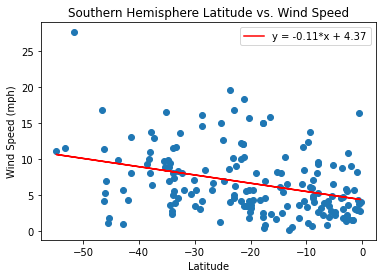

Correlation coefficient or r value = -0.341


In [21]:
# Generate a scatter plot of Southern Hemisphere Latitude vs. Wind Speed 
x_axis_south = Southern_Hemisphere["Latitude"]
y_axis_south_wind = Southern_Hemisphere["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south, y_axis_south_wind)
regress_values = x_axis_south*slope + intercept

plt.scatter(x_axis_south,y_axis_south_wind)
plt.plot(x_axis_south, regress_values, "r-", label = "y = {:.2f}*x + {:.2f}".format(slope, intercept))

plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()

plt.savefig("VS_South_Lat_vs_Wind_LinearRegression")
plt.show()

# r value = correlation coefficient 
correlation = st.pearsonr(x_axis_south,y_axis_south_wind)
print(f"Correlation coefficient or r value = {round(correlation[0],3)}")

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print({line_eq})

In [22]:
cities_df.to_csv("ExportCitiesfile.csv", header=True)

In [23]:
Northern_Hemisphere.to_csv("ExportNorthernCitiesfile.csv", header=True)
Southern_Hemisphere.to_csv("ExportSouthernCitiesfile.csv", header=True)